## Time to get your hands dirty! The irreducible mass of black holes.

This is an example that comes straight out of my research in general relativity.

**Gerosa, Fabbri, Sperhake (2022) "*The irreducible mass and the horizon area of LIGO's black holes*" [arxiv:2202.08848](https://arxiv.org/abs/2202.08848), [CQG 39 (2022) 175008](https://iopscience.iop.org/article/10.1088/1361-6382/ac8332)**

(some of the calculations here were first worked out by Cecilia Fabbri in her BSc thesis with me).

Consider a rotating black hole. In [1969](https://ui.adsabs.harvard.edu/abs/1969NCimR...1..252P/abstract), Roger Penrose (now [Nobel Prize in Physics](https://www.nobelprize.org/prizes/physics/2020/penrose/facts/) for the theory of black holes) discovered that one can extract energy from a rotating black hole:

![](https://inspirehep.net/files/268d28446b405e134199d84f67c23792)

(figure from [Harada, Kimura 2014](https://ui.adsabs.harvard.edu/abs/2014CQGra..31x3001H/abstract)).

Maybe some of you has seen this already in your GR class? In any case, a rotating black-hole has a region called ergosphere such that infalling particles have negative energy. Penrose imagined a particle that enters that region and decays: half will fall in and half will escape to infinity, carring some energy with it. In a nutshell, we've extracted energy=mass from a black hole! It turns out that one also has to extract angular momentum, not just energy (and here you'll need some GR do to this calculation, see e.g. the famous textbook by [Misner, Thorne and Weeler](https://press.princeton.edu/books/hardcover/9780691177793/gravitation)). But angular momentum runs our first, such that a repeated series of Penrose processes leaves behind a non-rotating BH with a remnant mass which is called "irreducible". This is a famous result by [Christodoulou 1970](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.25.1596) and is closely related to the even more famous area law by [Hawking (1971)](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.26.1344) (which in turns is the foundation of black-hole thermodynamics -- for you, my theorethical physics friend).

For a BH of mass $M$ spin $\chi\in [0,1]$, the irreducible mass is 
\begin{equation}
$$M_{irr} = M \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}}$$
\end{equation}
For convenience, let us define 

$$f(\chi) = \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}}$$

Suppose you have repeated measurments of $M$ and $\chi$. This is just because we're still frequentists for now. When we will put our Bayesian hat on, these distributions will be the *posterior samples* from a single measurement.

Let's assume that

- the spin $\chi$ is uniformly distributed between 0 and 1.
- the mass $M$ is normally distributed with mean $\mu$ and standard deviation $\sigma$.
- (masses and spins are uncorrelated)

These are simplistic assumption that, however, are not too far from what we are now measuring with gravitational-wave detectors. It's a toy model, but not a totally unreasonable one.

**Tasks**:
1. Start with a value of $\sigma=0.02$. Note that $\mu$ is a scale and not a parameter: you can normalize all quantities with a dimension of mass by $\mu$. Just set $\mu=1$ in your code and remember that all masses in the problem are measured in units of $\mu$. 

2. Plot the resulting pdf of $M_{\rm irr}$. First try an histogram with one the rules of thumb we've seen above.

*Hint (for point 2)*: You don't know the functional form of the pdf of $M_{\rm irr}$... but you don't need it if you just want to generate samples! That's the nice thing about numerics!

3. Using the same samples, plot the distribution of $M_{\rm irr}$ using a KDE.

4. Compute the KS distance between ${M_{\rm irr}}/\mu$ and ${f}$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$. 

5. Compute the KS distance between ${M_{\rm irr}}$ and $M$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$.

*Hint (for points 4 and 5)*. This is a KS test between two sets for samples, `scipy.stats.ks_2samp`.

You should find that (i) $M_{\rm irr}$ is distributed like $f$ if ${\sigma}\ll \mu$ and (ii) $M_{\rm irr}$ is distributed like $M$ if  $\sigma\gg \mu$.


7. [**Optional, not examinable**] Compute the pdf of $f$ from its mathematical definition (pen and paper!). Verify this result: 

\begin{equation}
\pi(f) = 2\frac{2 f^2-1}{\sqrt{1 - f^2}}\,.
\end{equation}

8. [**Optional, not examinable**]  Compute the pdfs of $M_{\rm irr}$ from its mathematical definition (pen and paper!). Verify this result:

$$
p(M_{\rm irr})  = \frac{\sqrt{2/\pi}}{\sigma} \int_{1/\sqrt{2}}^1 \exp\left[{-\frac{(M_{\rm irr}/f -\mu)^2}{2\sigma^2}}\right]  \frac{2 f^2-1}{f \sqrt{1 - f^2}}  \,\, {\rm d}f\,.
$$

The this expression is only semi-analytic; that integral should then be solved numerically.
*Hint (for point 8)*: You want to use [this theorem](https://en.wikipedia.org/wiki/Distribution_of_the_product_of_two_random_variables) for the product of two random variables. 

9. Using the expressions from point 7 and 8, plot those pdfs check that they agree with your KDE reconstructions.

In [9]:
# LECTURE 7 -> IRREDUCIBLE MASS OF BLACK HOLES: it is possible to extract energy = mass and angular momentum from a black hole, 
# the angular momentum runs our first leaving a non-rotating BH with a remnant mass which is called "irreducible"

In [10]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import kstest
from scipy.stats import ks_2samp
from scipy.stats import ksone 
from sklearn.neighbors import KernelDensity
from scipy.stats import ks_2samp # KS test between 2 empirical distributions
from scipy.integrate import quad

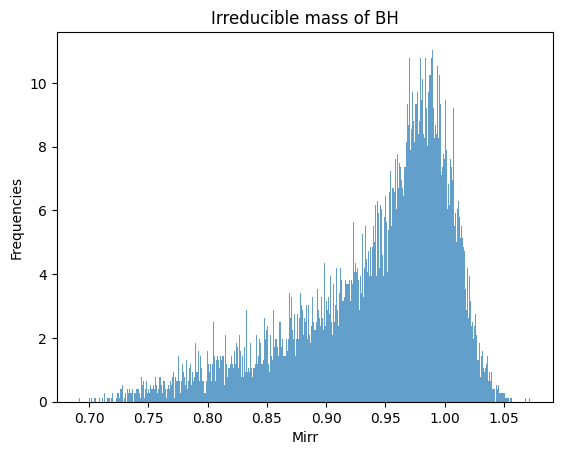

In [11]:
# X is the spin [0; 1] ->  Mirr = F(X) = M * sqrt(1/2 * (1 + sqrt(1-X**2))) 
# SPIN uniformly distributed between 0 and 1

# MASS normally distributed with mean mu and standard deviation -> mu = 1, st = 0.02 
mu = 1 
sigma = 0.02

def F (M, X): 
    return M * np.sqrt(1/2 * (1 + np.sqrt(1-X**2)))

# > Plot the resulting pdf of Mirr histogram

# Random generation of values of mass M and spin X -> irreducible mass data
N = 10000
M = np.random.normal(mu, sigma, N)
X = np.random.uniform(0, 1, N)

Mirr = F(M, X)

plt.hist(Mirr, bins = int(len(Mirr)/20), density='True', alpha = 0.7) 
plt.title("Irreducible mass of BH")
plt.xlabel("Mirr")
plt.ylabel("Frequencies")
plt.show()

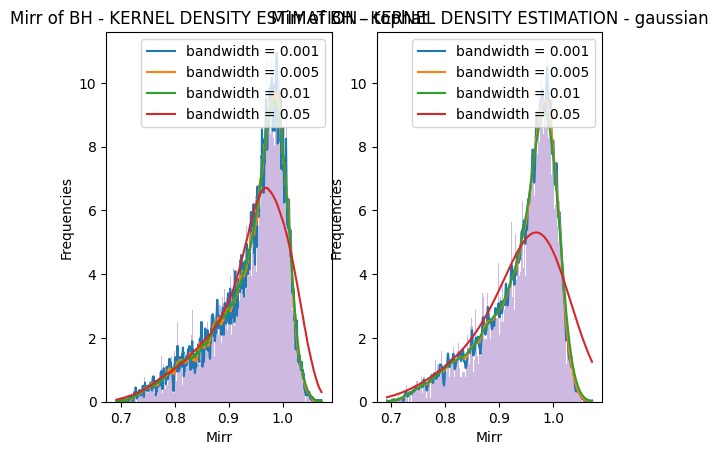

In [ ]:
# > Kernel Density Estimation (KDE) -> each point is represented by a gaussian centered in the point and with standard deviation 0.02
xgrid = np.linspace(Mirr.min(), Mirr.max(),1000)

# Function to do KDE with different bandwidth and kernels
def kde_sklearn(data, bandwidth, kernel):
    kde_skl = KernelDensity(bandwidth = bandwidth, kernel=kernel)
    kde_skl.fit(data[:, np.newaxis]) # 2D array is needed
    log_pdf = kde_skl.score_samples(xgrid[:, np.newaxis]) # sklearn returns log(density)
    return np.exp(log_pdf)

plt.subplot(1, 2, 1)
for st in [0.001, 0.005, 0.01, 0.05]:
    PDFtophat = kde_sklearn(Mirr,bandwidth=st,kernel="tophat") # kernel = "tophat" = box function
    plt.plot(xgrid, PDFtophat, label=f'bandwidth = {st}')

plt.hist(Mirr, bins = int(len(Mirr)/20), density='True', alpha = 0.45) 

plt.title("Mirr of BH - KERNEL DENSITY ESTIMATION - tophat")
plt.xlabel("Mirr")
plt.ylabel("Frequencies")
plt.legend()

plt.subplot(1, 2, 2)
for st in [0.001, 0.005, 0.01, 0.05]:
    PDFgaussian = kde_sklearn(Mirr,bandwidth=st,kernel="gaussian")
    plt.plot(xgrid, PDFgaussian, label=f'bandwidth = {st}')

plt.hist(Mirr, bins = int(len(Mirr)/20), density='True', alpha = 0.45) 

plt.title("Mirr of BH - KERNEL DENSITY ESTIMATION - gaussian")
plt.xlabel("Mirr")
plt.ylabel("Frequencies")
plt.legend()
plt.show()

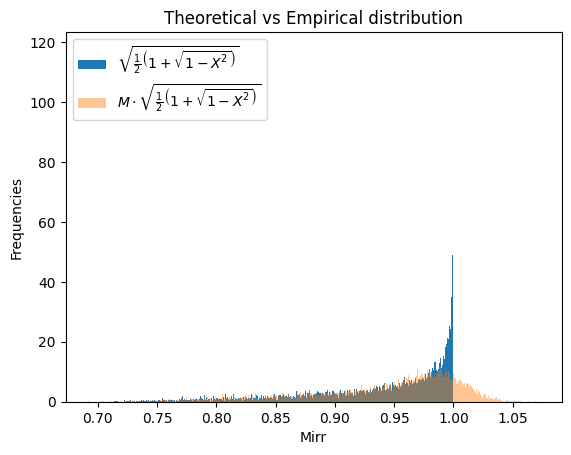

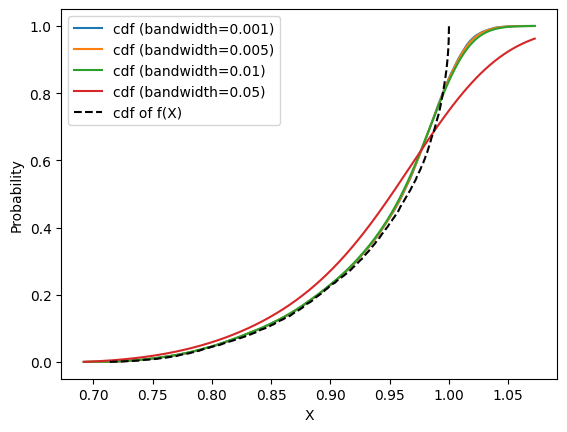

In [ ]:
# > Comparison between theoretical and empirical distribution
m1 = np.ones(N)
f = F(m1, X) # theoretical distribution

formula = r'$M \cdot \sqrt{\frac{1}{2} \left(1 + \sqrt{1 - X^2}\right)}$'
formula1 = r'$\sqrt{\frac{1}{2} \left(1 + \sqrt{1 - X^2}\right)}$'

plt.hist(f, bins = int(len(Mirr)/20), density='True', label=formula1) 
plt.hist(Mirr, bins = int(len(Mirr)/20), density='True', alpha = 0.45, label=formula) 

plt.xlabel("Mirr")
plt.ylabel("Frequencies")
plt.legend()
plt.title("Theoretical vs Empirical distribution")
plt.show()

for st in [0.001, 0.005, 0.01, 0.05]:
    PDFgaussian = kde_sklearn(Mirr, bandwidth=st, kernel="gaussian")
    cdf = np.cumsum(PDFgaussian) * (xgrid[1] - xgrid[0]) # CDF from the KDE method
    plt.plot(xgrid, cdf, label = f'cdf (bandwidth={st})')

# Theoretical CDF
f_sorted = np.sort(f) # swap in crescent order
cdf_f = np.arange(1, N + 1) / N # CDF: probability that a random value is less than or equal to a certain value x
plt.plot(f_sorted, cdf_f, label = 'cdf of f(X)', linestyle='--', color='black')

plt.xlabel("X")
plt.ylabel("Probability")
plt.legend()
plt.show()


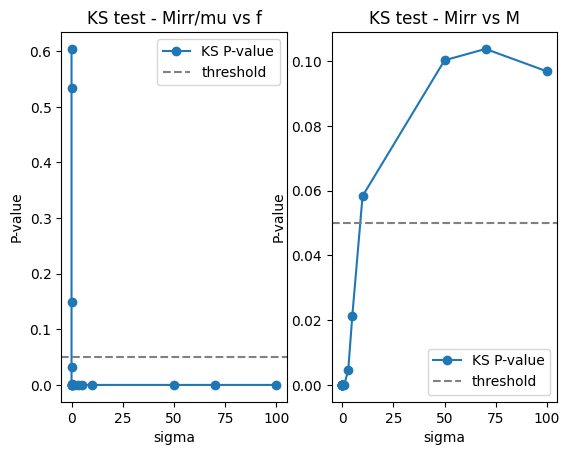

In [ ]:
# > Kolmogorov-Smirnov (KS) Test: measurement of the maximum vertical distance betweeen the CDFs
# The distributions are compatible? p-value limit = 0.05 -> if p-value > threshold, they are compatible

# comparison Mirr and f
sigmas = [0.00009, 0.0001, 0.0002, 0.0003, 0.0005, 0.0009, 0.002, 0.02, 0.1, 1, 3, 5, 10, 50, 70, 100]
D_vals = []
p_vals = []

for sigma in sigmas:
    N = 10000
    M = np.random.normal(mu, sigma, N)
    X = np.random.uniform(0, 1, N)
    m1 = np.ones(N)
    Mirr = F(M, X)/mu # to normalise
    f = F(m1, X) 

    D, p = ks_2samp(Mirr, f)  # D = KS test statistics - p = p-value
    
    D_vals.append(D)
    p_vals.append(p)

plt.figure()
plt.subplot(1, 2, 1)
plt.plot(sigmas, p_vals, marker='o', label='KS P-value')
plt.axhline(0.05, color='gray', linestyle='--', label='threshold')
plt.xlabel("sigma")
plt.ylabel("P-value")
plt.legend()
plt.title("KS test - Mirr/mu vs f")

# comparison Mirr and M
sigmas = [0.00009, 0.0001, 0.0002, 0.0003, 0.0005, 0.0009, 0.002, 0.02, 0.1, 1, 3, 5, 10, 50, 70, 100]
D_vals = []
p_vals = []

for sigma in sigmas:
    N = 10000
    M = np.random.normal(mu, sigma, N)
    X = np.random.uniform(0, 1, N)
    Mirr = F(M, X)

    D, p = ks_2samp(Mirr, M)  # D = KS test statistics - p = p-value

    D_vals.append(D)
    p_vals.append(p)

plt.subplot(1, 2, 2)
plt.plot(sigmas, p_vals, marker='o', label='KS P-value')
plt.axhline(0.05, color='gray', linestyle='--', label='threshold')
plt.xlabel("sigma")
plt.ylabel("P-value")
plt.legend()
plt.title("KS test - Mirr vs M")
plt.show()

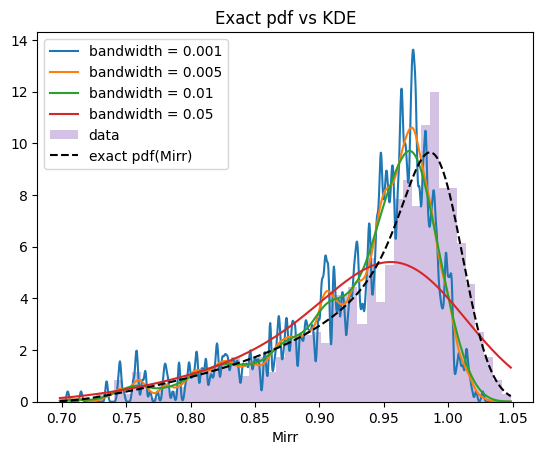

In [15]:
# > Computed the pdfs of f and Mirr, compare them with KDE
def pdf_f(f):
    return 2 * (2*f**2-1)/np.sqrt(1-f**2)

mu = 1
sigma = 0.02

def f_int(Mirr, f): # integrand function
    if f < 0 or f > 1:
        return 0
    exp = np.exp(-((Mirr / f - mu)**2) / (2 * sigma**2))
    jac = (2 * f**2 - 1) / (f * np.sqrt(1 - f**2))

    return exp * jac 

a = 1 / np.sqrt(2)
b = 1.0

# Mirr = M * f -> pdf Mirr = pdf(M) * pdf(f) * 1/f 
def pdf_Mirr(Mirr_val):
    INT, _ = quad(lambda f: f_int(Mirr_val, f), a, b) 
    return INT * np.sqrt(2/np.pi)/sigma

N = 1000
M = np.random.normal(mu, sigma, N)
X = np.random.uniform(0, 1, N)
M1 = np.ones(N)

Mirr = F(M, X)
f = F(M1, X)

xgridm = np.linspace(Mirr.min(), Mirr.max(), 1000)
pdfmirr = np.array([pdf_Mirr(val) for val in xgridm])

for st in [0.001, 0.005, 0.01, 0.05]:
    PDFgaussian = kde_sklearn(Mirr,bandwidth=st,kernel="gaussian")
    plt.plot(xgridm, PDFgaussian, label=f'bandwidth = {st}')

plt.hist(Mirr, bins = int(len(Mirr)/20), density='True', alpha = 0.4, label = 'data') 
plt.plot(xgridm, pdfmirr, color = 'black', linestyle = '--', label='exact pdf(Mirr)')
plt.xlabel("Mirr")
plt.title("Exact pdf vs KDE") 
plt.legend()
plt.show()